# Displaying an Image in Google Colab with OpenCV

This snippet demonstrates how to load and display an image using OpenCV in a Google Colab notebook.

- **`cv2.imread(path)`**: Reads an image from the specified file path and stores it as a multidimensional NumPy array representing pixel values. This is the standard way to load images in OpenCV.

- **`cv2_imshow(image)`**: Displays the image inside the Colab notebook. Unlike `cv2.imshow()`, which opens a separate window (only works on local machines), `cv2_imshow` is specifically designed to render images directly in notebook output cells.

**Summary:**  
1. Load an image into memory with `cv2.imread`.  
2. Display it in the notebook using `cv2_imshow`.  

> Note: These functions are essential for quickly visualizing images when working with OpenCV in Colab.


In [ ]:
import cv2
from google.colab.patches import cv2_imshow


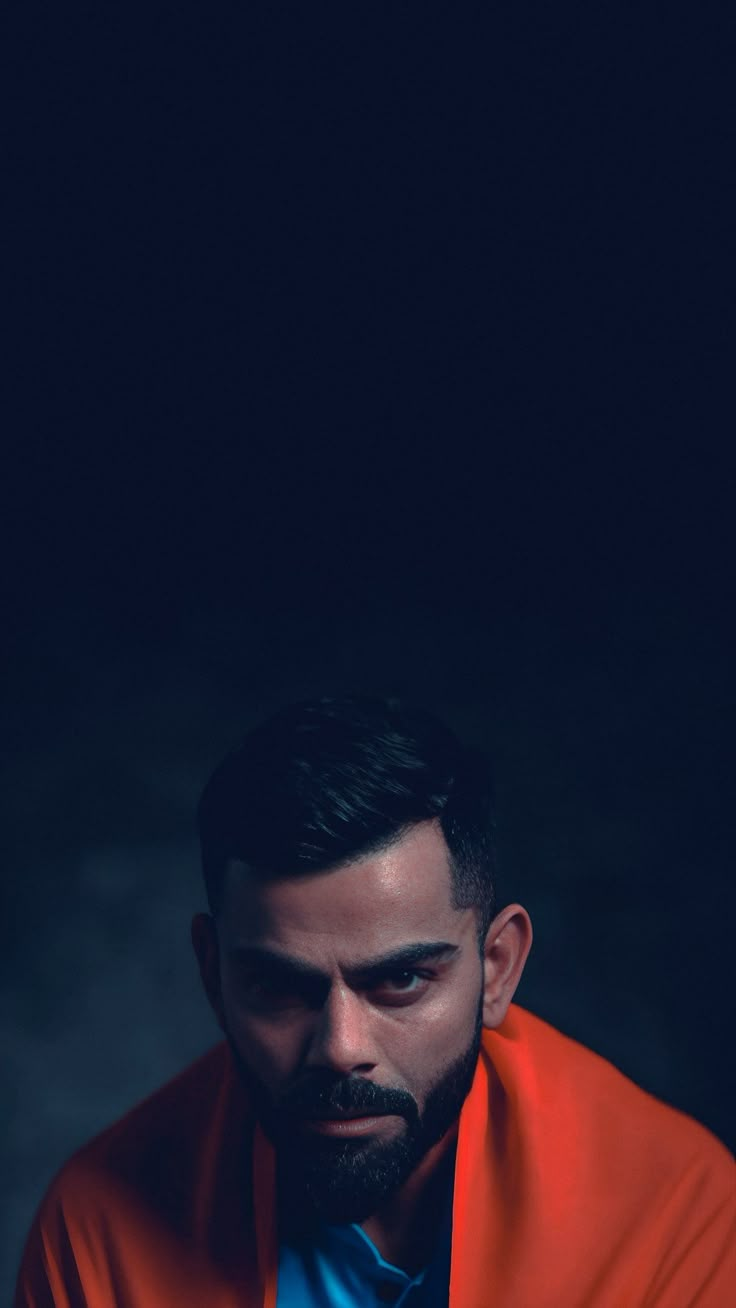

In [ ]:
img=cv2.imread('/content/vk.jpg') #enter your own file path
cv2_imshow(img)



This snippet demonstrates how to convert a color image to grayscale and display it in a Colab notebook.

- **`cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)`**: Converts the original color image (`img`) from BGR (Blue, Green, Red) color space to grayscale. Grayscale images have only one channel, representing intensity, which simplifies many image processing tasks like edge detection or thresholding.

- **`cv2_imshow(gray_img)`**: Displays the grayscale image inside the Colab notebook. Like before, this is used instead of `cv2.imshow()` because Colab does not support opening external windows.

**Summary:**  
1. Convert a color image to grayscale using `cv2.cvtColor`.  
2. Display the result in the notebook with `cv2_imshow`.  

> Grayscale images are lighter to process computationally and are widely used in computer vision tasks.


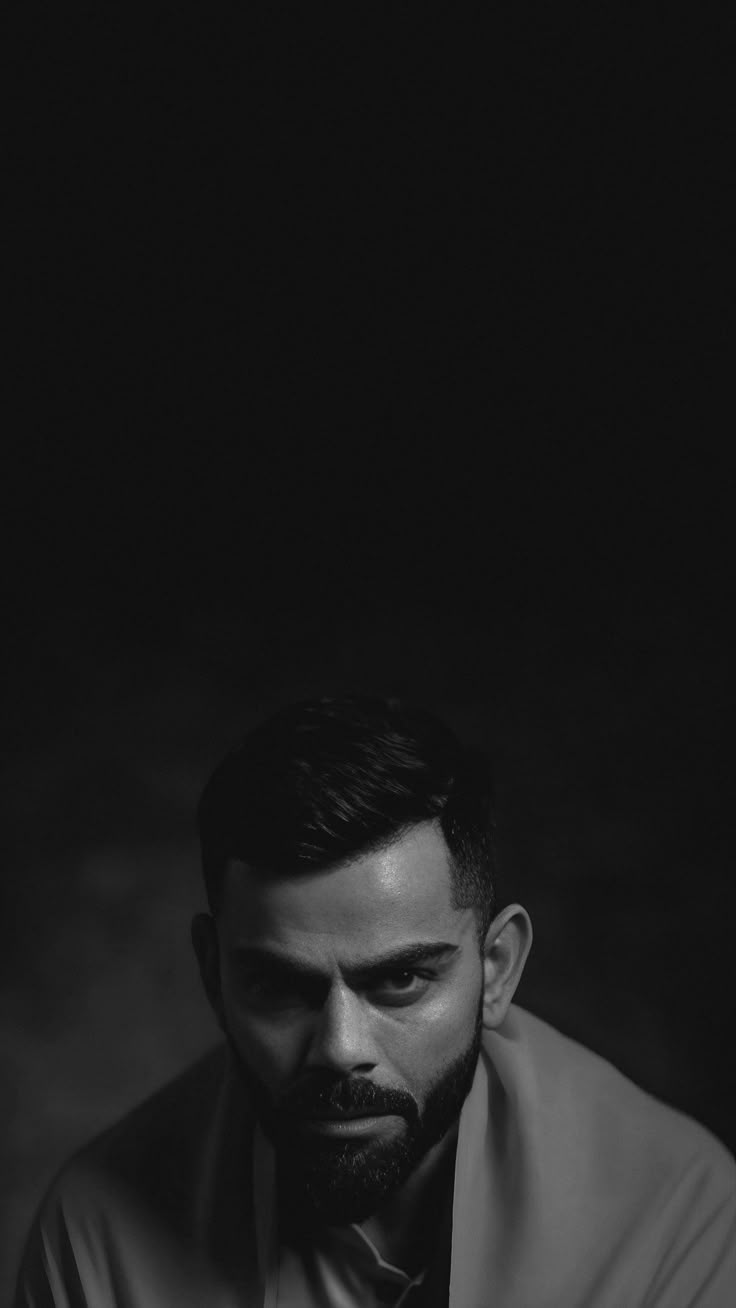

In [ ]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

# Applying Gaussian Blur to an Image with OpenCV in Google Colab

This snippet demonstrates how to apply a Gaussian blur to an image and display both the original and blurred images in a Colab notebook.

- **`cv2.GaussianBlur(img, (7,7), 0)`**: Applies a Gaussian blur to the image.  
  - `(7,7)` specifies the kernel size, i.e., the size of the filter used to smooth the image. Larger kernels create stronger blurring.  
  - `0` specifies the standard deviation in the X and Y directions; OpenCV calculates it automatically when set to 0.  
  - Gaussian blur reduces noise and detail in the image, which is useful for preprocessing tasks like edge detection.

- **`cv2_imshow(img)`**: Displays the original image in the notebook.

- **`cv2_imshow(blurred_img)`**: Displays the blurred image in the notebook, showing the smoothing effect.

**Summary:**  
1. Original image is loaded and displayed.  
2. Gaussian blur is applied to smooth the image and reduce noise.  
3. Both original and blurred images are displayed for comparison.  

> Gaussian blur is widely used in computer vision to remove small variations in images and prepare them for further analysis.


original:


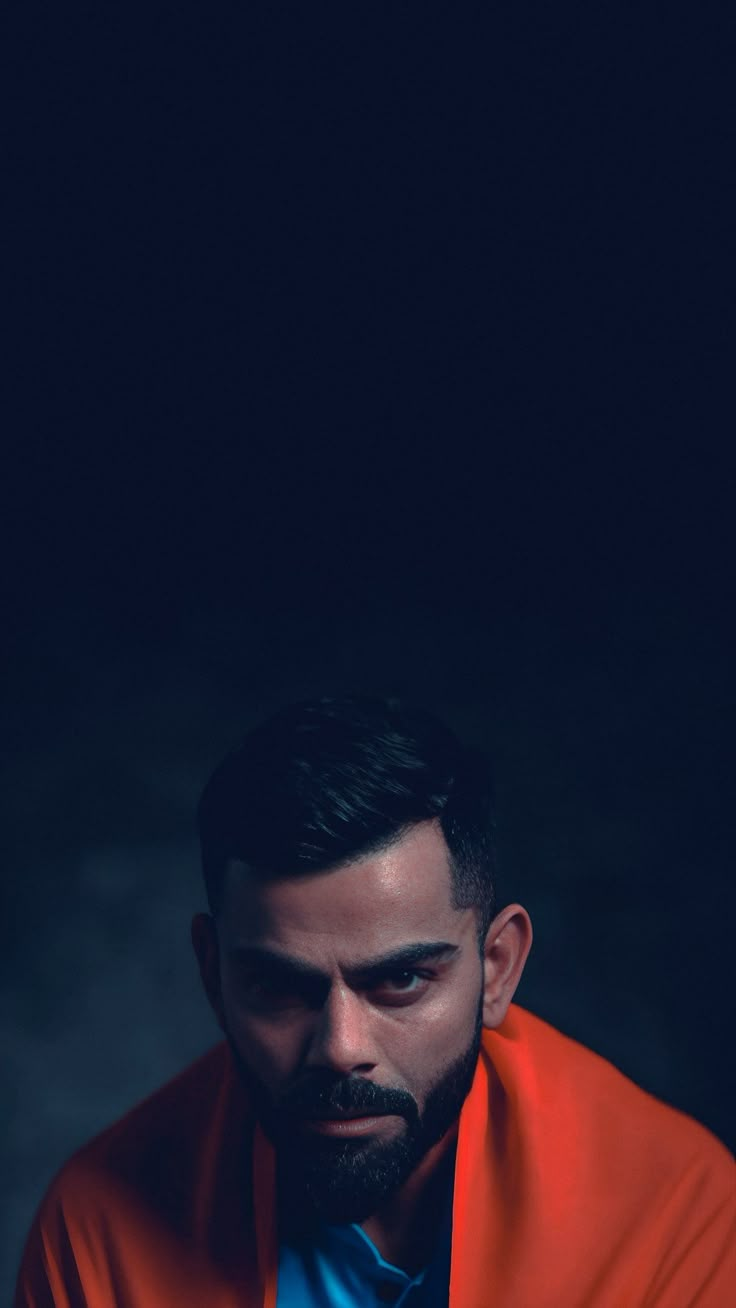

blurred


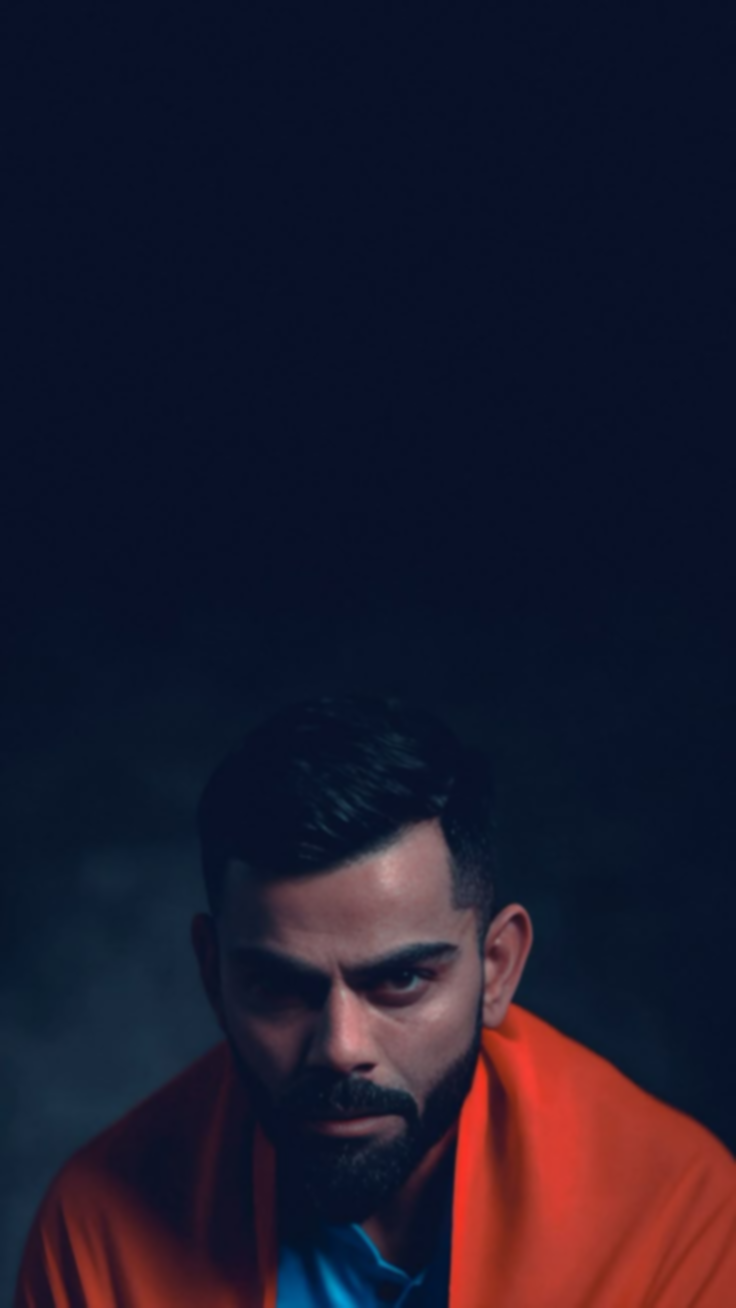

In [ ]:
blurred_img=cv2.GaussianBlur(img,(7,7),0)
print('original:')
cv2_imshow(img)
print('blurred')
cv2_imshow(blurred_img)

# Edge Detection Using Canny Algorithm in OpenCV

This snippet demonstrates how to detect edges in an image using the Canny edge detector.

- **`cv2.Canny(gray_img, 80, 200)`**: Detects edges in the grayscale image.  
  - `gray_img` is the input image (should be grayscale).  
  - `80` is the lower threshold for edge detection.  
  - `200` is the upper threshold.  
  - Pixels with a gradient higher than the upper threshold are considered strong edges, while those between the thresholds are considered weak edges and included only if connected to strong edges.  

- **`cv2_imshow(canny_image)`**: Displays the resulting edge-detected image in the notebook.

**Summary:**  
1. Convert the image to grayscale (edges are easier to detect in single-channel images).  
2. Apply the Canny edge detector to highlight sharp changes in intensity.  
3. Display the edges, which appear as white lines on a black background.  

> Canny edge detection is commonly used in computer vision for object detection, shape analysis, and feature extraction.


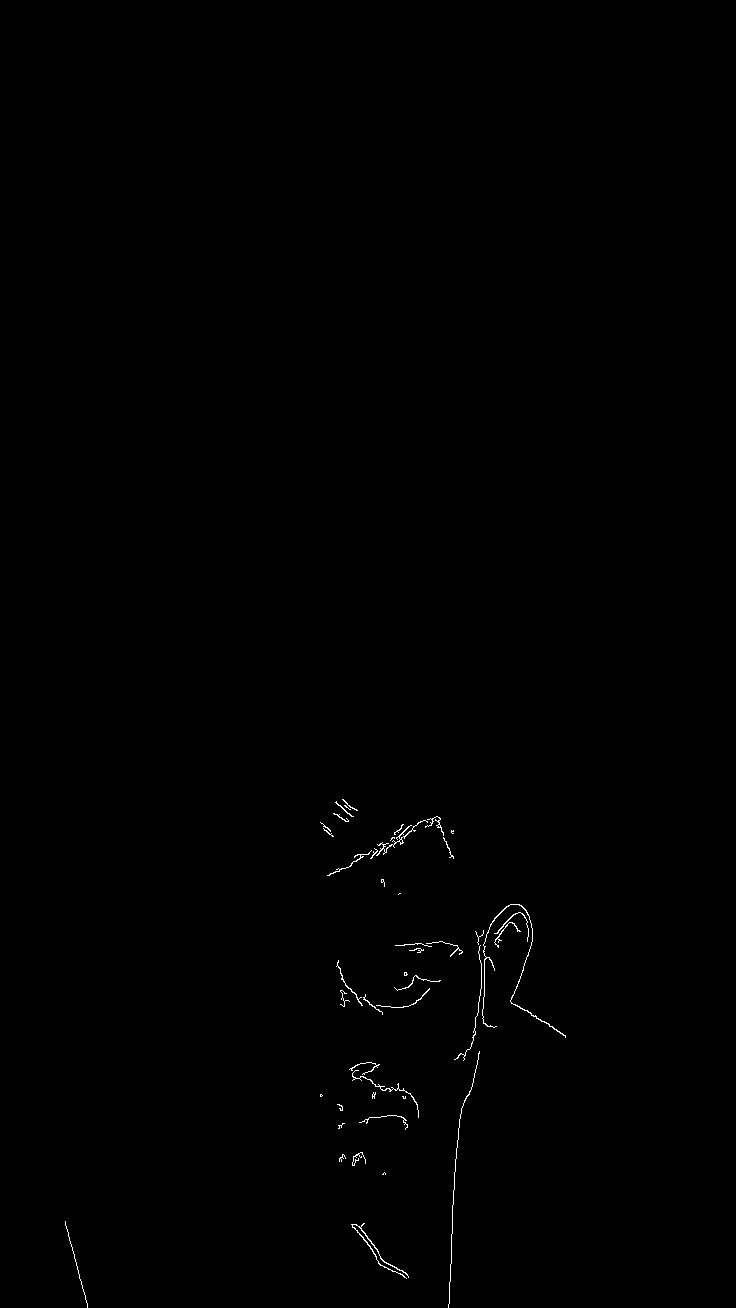

In [ ]:
canny_image=cv2.Canny(gray_img,80,200)
cv2_imshow(canny_image)

# Creating a Sketch-Like Outline of an Image with OpenCV (Google Colab)

This snippet demonstrates how to convert an image into a sketch-like outline by using grayscale conversion, thresholding, and contour detection.

- **`img1.copy()`**: Creates a copy of the original image to preserve it for later use.  

- **`cv2.cvtColor(img_cpy, cv2.COLOR_BGR2GRAY)`**: Converts the copied image to grayscale. This simplifies processing, as we now have only intensity values instead of full color channels.  

- **`cv2.threshold(gray, 85, 255, cv2.THRESH_BINARY)`**: Converts the grayscale image to a binary image.  
  - Pixels with intensity above `85` become `255` (white), and those below become `0` (black).  
  - This creates a high-contrast image suitable for contour detection.  

- **`cv2.findContours(thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)`**: Detects contours (boundaries of shapes) in the binary image.  
  - `cv2.RETR_TREE` retrieves all contours and reconstructs a full hierarchy of nested contours.  
  - `cv2.CHAIN_APPROX_SIMPLE` compresses horizontal, vertical, and diagonal segments, keeping only their endpoints to save memory.  

- **`np.zeros_like(img1)`**: Creates a blank image with the same dimensions as the original to draw the sketch.  

- **`cv2.drawContours(sketch, contours, -1, (255,255,255), 1)`**: Draws all detected contours onto the blank image in white with a thickness of 1 pixel, producing a sketch-like outline.  

- **`cv2_imshow(img1)`**: Displays the original image.  

- **`cv2_imshow(sketch)`**: Displays the sketched outline image.  

**Summary:**  
1. Convert the image to grayscale and threshold it to highlight shapes.  
2. Detect contours to extract the outlines of objects.  
3. Draw these contours on a blank canvas to create a sketch effect.  

> This technique is useful for creating artistic outlines or preprocessing images for shape-based analysis in computer vision.


original


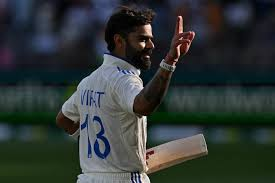

sketched


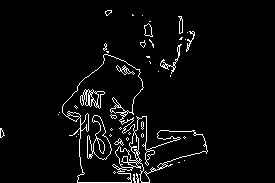

In [ ]:

import numpy as np
# Create a copy to work on
img1=cv2.imread('/content/vk1.jpg')
img_cpy = img1.copy()

# Convert to grayscale
gray = cv2.cvtColor(img_cpy, cv2.COLOR_BGR2GRAY)

# Apply binary threshold
_, thres = cv2.threshold(gray, 85, 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_cpy = img1.copy()
sketch = np.zeros_like(img1)
cv2.drawContours(sketch,contours,-1,(255,255,255),1)
print('original')
cv2_imshow(img1)
print('sketched')
cv2_imshow(sketch)
